In [ ]:
"""
Project 4
"""

In [3]:
"""
Provide code and solution for Application 4
"""

DESKTOP = True

import math
import random
import urllib2
import copy
if DESKTOP:
    import matplotlib.pyplot as plt
    #import alg_project4_solution as student
else:
    import simpleplot
    import userXX_XXXXXXX as student
    

# URLs for data files
PAM50_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_PAM50.txt"
HUMAN_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_HumanEyelessProtein.txt"
FRUITFLY_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_FruitflyEyelessProtein.txt"
CONSENSUS_PAX_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_ConsensusPAXDomain.txt"
WORD_LIST_URL = "http://storage.googleapis.com/codeskulptor-assets/assets_scrabble_words3.txt"

###############################################
# provided code

def read_scoring_matrix(filename):
    """
    Read a scoring matrix from the file named filename.  

    Argument:
    filename -- name of file containing a scoring matrix

    Returns:
    A dictionary of dictionaries mapping X and Y characters to scores
    """
    scoring_dict = {}
    scoring_file = urllib2.urlopen(filename)
    ykeys = scoring_file.readline()
    ykeychars = ykeys.split()
    for line in scoring_file.readlines():
        vals = line.split()
        xkey = vals.pop(0)
        scoring_dict[xkey] = {}
        for ykey, val in zip(ykeychars, vals):
            scoring_dict[xkey][ykey] = int(val)
    return scoring_dict

def read_protein(filename):
    """
    Read a protein sequence from the file named filename.

    Arguments:
    filename -- name of file containing a protein sequence

    Returns:
    A string representing the protein
    """
    protein_file = urllib2.urlopen(filename)
    protein_seq = protein_file.read()
    protein_seq = protein_seq.rstrip()
    return protein_seq

def read_words(filename):
    """
    Load word list from the file named filename.

    Returns a list of strings.
    """
    # load assets
    word_file = urllib2.urlopen(filename)
    
    # read in files as string
    words = word_file.read()
    
    # template lines and solution lines list of line string
    word_list = words.split('\n')
    print "Loaded a dictionary with", len(word_list), "words"
    return word_list


In [17]:
"""
Project 4: Matrix Function
http://www.codeskulptor.org/#user46_g69FbaRU4b_49.py
"""

def build_scoring_matrix(alphabet,diag_score,off_diag_score,dash_score):
    """
    Takes a set of characters alphabet and three scores,
    returns a dictionary of dictionaries whose entries 
    are indexed by pairs of characters in alphabet and '-'
    """
    scoring_matrix = {}
    alphabet1=list(alphabet)
    alphabet1.append('-')
    for dummy_1 in alphabet1:
        scoring_matrix[dummy_1] = {}
        for dummy_2 in alphabet1:
            if dummy_1 == '-' or dummy_2 == '-':
                scoring_matrix[dummy_1][dummy_2] = dash_score
            elif dummy_1 == dummy_2:
                scoring_matrix[dummy_1][dummy_2] = diag_score  
            else: 
                scoring_matrix[dummy_1][dummy_2] = off_diag_score
    return scoring_matrix

def compute_alignment_matrix(seq_x, seq_y, scoring_matrix, global_flag):
    """
    Compute alignment matrix by taking two sequences and a scoring matrix
    Global_flag can be True or False (negative num = 0)
    """
    len_x = len(seq_x)
    len_y = len(seq_y)
    alignment_matrix = [[0 for dummy_i in range(len_y+1)] for dummy_j in range(len_x+1)]

    for dummy_i in range(1, len_x+1, 1):
        val = alignment_matrix[dummy_i-1][0]+scoring_matrix[seq_x[dummy_i-1]]['-']
        alignment_matrix[dummy_i][0] = 0 if global_flag ==False and val < 0 else val

    for dummy_j in range(1,len_y+1,1):
        val = alignment_matrix[0][dummy_j-1]+scoring_matrix['-'][seq_y[dummy_j-1]]
        alignment_matrix[0][dummy_j] = 0 if global_flag ==False and val < 0 else val
    
    for dummy_i in range(1, len_x+1, 1):
        for dummy_j in range(1, len_y+1, 1):
            val = [alignment_matrix[dummy_i-1][dummy_j-1]+scoring_matrix[seq_x[dummy_i-1]][seq_y[dummy_j-1]]]
            val.append(alignment_matrix[dummy_i-1][dummy_j]+scoring_matrix[seq_x[dummy_i-1]]['-'])
            val.append(alignment_matrix[dummy_i][dummy_j-1]+scoring_matrix['-'][seq_y[dummy_j-1]])
            max_val = max(val)
            alignment_matrix[dummy_i][dummy_j] = 0 if global_flag ==False and max_val < 0 else max_val                                                                      
    
    return alignment_matrix

def compute_global_alignment(seq_x,seq_y,scoring_matrix,alignment_matrix):
    """
    Computes global alignment of two sequences using alignment matrix;
    Returns tuple (score,align_x,align_y);
    score is the alignment score of align_x, align_y of the same length
    Scoring_matrix M, alignment_matrix S
    """
    len_x = len(seq_x)
    len_y = len(seq_y)
    
    dummy_i = len_x
    dummy_j = len_y
    
    x_prime = ''
    y_prime = ''
    score = alignment_matrix[dummy_i][dummy_j]
    
    while dummy_i != 0 and dummy_j !=0:
        if alignment_matrix[dummy_i][dummy_j] == alignment_matrix[dummy_i-1][dummy_j-1]+\
        scoring_matrix[seq_x[dummy_i-1]][seq_y[dummy_j-1]]:
            x_prime = seq_x[dummy_i-1] + x_prime
            y_prime = seq_y[dummy_j-1] + y_prime
            dummy_i -=1
            dummy_j -=1
        else:
            if alignment_matrix[dummy_i][dummy_j] == alignment_matrix[dummy_i-1][dummy_j]+\
        scoring_matrix[seq_x[dummy_i-1]]['-']:
                x_prime = seq_x[dummy_i-1] + x_prime
                y_prime = '-' + y_prime            
                dummy_i -=1
            else:
                x_prime = '-' + x_prime
                y_prime = seq_y[dummy_j-1] + y_prime       
                dummy_j -=1  
    while dummy_i != 0:
        x_prime = seq_x[dummy_i-1] + x_prime
        y_prime = '-' + y_prime            
        dummy_i -=1   
    while dummy_j != 0:
        x_prime = '-' + x_prime
        y_prime = seq_y[dummy_j-1] + y_prime       
        dummy_j -=1  

    return (score, x_prime, y_prime)

def compute_local_alignment(seq_x,seq_y,scoring_matrix,alignment_matrix):
    """
    Computes local alignment of two sequences using alignment matrix;
    Returns tuple (score,align_x,align_y);
    score is the alignment score of align_x, align_y of the same length
    Scoring_matrix M, alignment_matrix S
    """
    len_x = len(seq_x)
    len_y = len(seq_y)
    
    score = alignment_matrix[len_x][len_y]

    dummy_i = len_x
    dummy_j = len_y
    
    x_prime = ''
    y_prime = ''

    for dummy_m in range(len_x, -1, -1):
        for dummy_n in range(len_y, -1, -1):
            if alignment_matrix[dummy_m][dummy_n] > score:
                score = alignment_matrix[dummy_m][dummy_n] 
                dummy_i = dummy_m
                dummy_j = dummy_n

    while alignment_matrix[dummy_i][dummy_j] !=0:
        if alignment_matrix[dummy_i][dummy_j] == alignment_matrix[dummy_i-1][dummy_j-1]+\
        scoring_matrix[seq_x[dummy_i-1]][seq_y[dummy_j-1]]:
            x_prime = seq_x[dummy_i-1] + x_prime
            y_prime = seq_y[dummy_j-1] + y_prime
            dummy_i -=1
            dummy_j -=1
        else:
            if alignment_matrix[dummy_i][dummy_j] == alignment_matrix[dummy_i-1][dummy_j]+\
        scoring_matrix[seq_x[dummy_i-1]]['-']:
                x_prime = seq_x[dummy_i-1] + x_prime
                y_prime = '-' + y_prime            
                dummy_i -=1
            else:
                x_prime = '-' + x_prime
                y_prime = seq_y[dummy_j-1] + y_prime       
                dummy_j -=1  

    return (score, x_prime, y_prime)


# Question 1

In [12]:
# load files
human_protein = read_protein(HUMAN_EYELESS_URL)
fly_protein = read_protein(FRUITFLY_EYELESS_URL)
pam_50 = read_scoring_matrix(PAM50_URL)  #amino acid scoring matrix

In [20]:
# compute the local alignments of the sequences; and enter the score and local alignments
human_fly_alignment_matrix = compute_alignment_matrix(human_protein, fly_protein, pam_50, False) #local one with False
#human_ply_global_alignment = compute_global_alignment(human_protein, fly_protein, pam_50, human_fly_alignment_matrix)
human_fly_local_alignment = compute_local_alignment(human_protein, fly_protein, pam_50, human_fly_alignment_matrix)

In [63]:
print 'local alignment score: '+ str(human_fly_local_alignment[0])
print 'human sequence: '+ str(human_fly_local_alignment[1])
print 'fly sequence: '+ str(human_fly_local_alignment[2])

local alignment score: 875
human sequence: HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ
fly sequence: HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


# Question 2

In [25]:
consensus = read_protein(CONSENSUS_PAX_URL) #load the concensus DNA sequence

In [33]:
# delete dashes in fly and human sequences
human_seq = human_fly_local_alignment[1]
human_seq_clean = filter(lambda ele: ele != '-', human_seq)
fly_seq=human_fly_local_alignment[2]
fly_seq_clean = filter(lambda ele: ele != '-', fly_seq)

In [36]:
# compute global alignment of dashless local human/fly sequences with concensus PAX sequence
human_concensus_alignment_matrix = compute_alignment_matrix(human_seq_clean, consensus, pam_50, True)
human_concensus_global = compute_global_alignment(human_seq_clean,consensus,pam_50,human_concensus_alignment_matrix)
fly_concensus_alignment_matrix = compute_alignment_matrix(fly_seq_clean, consensus, pam_50, True)
fly_concensus_global = compute_global_alignment(fly_seq_clean,consensus,pam_50,fly_concensus_alignment_matrix)

In [59]:
# Compare corresponding elements of these two globally-aligned sequences (local vs. consensus) 
# human vs. concensus
print human_concensus_global[1]
print human_concensus_global[2]

print 
# fly vs. concensus
print fly_concensus_global[1]
print fly_concensus_global[2]

-HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQ
GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR--------

-HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ
GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR---------


In [64]:
#compute the percentage of elements in these two sequences that agree. (human/fly vs concensus)
def compute_agreement(seq_x, seq_y):
    """
    Compute the percentage of elements in these two sequences that agree
    """
    length = len(seq_x)
    count = 0.0
    for dummy_i in range(length):
        if seq_x[dummy_i] == seq_y[dummy_i]:
            count +=1
    return count/length
print 'human vs. consensus: '+str(compute_agreement(human_concensus_global[1], human_concensus_global[2]))
print 'fly vs. consensus: '+str(compute_agreement(fly_concensus_global[1], fly_concensus_global[2]))

human vs. consensus: 0.729323308271
fly vs. consensus: 0.701492537313


# Question 3

The length of the local alignment(Q1) between human and fly protein is 133. The length of the global alignment of human/fly to consensus is 134. The chance that there is 134 amino acid similar between two sequences is 1/23**(134), which is nearly 0. Thus it is hardly by chance that the local alignment in Q1 and the global alignments in Q2 are by chance.

# Question 4

In [21]:
def compute_alignment_matrix_local(seq_x, seq_y, scoring_matrix):
    """
    2nd version of compute_alignment_matrix to simplify computation
    Compute alignment matrix by taking two sequences and a scoring matrix
    Global_flag to be False for local
    """
    len_x = len(seq_x)
    len_y = len(seq_y)
    alignment_matrix = [[0 for dummy_i in range(len_y+1)] for dummy_j in range(len_x+1)]

    for dummy_i in range(1, len_x+1, 1):
        val = alignment_matrix[dummy_i-1][0]+scoring_matrix[seq_x[dummy_i-1]]['-']
        alignment_matrix[dummy_i][0] = val if val >= 0 else 0

    for dummy_j in range(1,len_y+1,1):
        val = alignment_matrix[0][dummy_j-1]+scoring_matrix['-'][seq_y[dummy_j-1]]
        alignment_matrix[0][dummy_j] = val if val >= 0 else 0
    
    for dummy_i in range(1, len_x+1, 1):
        for dummy_j in range(1, len_y+1, 1):
            val = [alignment_matrix[dummy_i-1][dummy_j-1]+scoring_matrix[seq_x[dummy_i-1]][seq_y[dummy_j-1]],
                  alignment_matrix[dummy_i-1][dummy_j]+scoring_matrix[seq_x[dummy_i-1]]['-'],
                  alignment_matrix[dummy_i][dummy_j-1]+scoring_matrix['-'][seq_y[dummy_j-1]]]
            val.sort()
            alignment_matrix[dummy_i][dummy_j] = val[-1] if val[-1] >= 0 else 0                                                                     
    
    score = alignment_matrix[len_x][len_y]
    
    for dummy_m in range(len_x, -1, -1):
        for dummy_n in range(len_y, -1, -1):
            if alignment_matrix[dummy_m][dummy_n] > score:
                score = alignment_matrix[dummy_m][dummy_n]     
    
    return score

In [137]:
def generate_null_distribution(seq_x,seq_y,scoring_matrix,num_trials):
    """
    Returns a dictionary scoring_distribution that 
    represents an un-normalized distribution generated 
    by performing a process num_trials times
    """
    scoring_distribution = {}
    
    for time in range(num_trials):
        rand_y = list(seq_y)
        random.shuffle(rand_y) #shuffle makes each trial/rand_y different       
        rand_y = ''.join(rand_y)
        
        score = compute_alignment_matrix_local(seq_x, rand_y, scoring_matrix) #local alignment
        #score = compute_local_alignment_score(seq_x,rand_y,scoring_matrix,alignment_matrix)
        
        if score not in scoring_distribution:
            scoring_distribution[score] = 1
        else:
            scoring_distribution[score] +=1
    
    return scoring_distribution

In [138]:
#create a distribution with 1000 trials using the protein sequences HumanEyelessProtein and FruitflyEyelessProtein
human_fly_distribution = generate_null_distribution(human_protein,fly_protein,pam_50,1000) #{score: frequency}
print human_fly_distribution

{39: 3, 40: 5, 41: 16, 42: 17, 43: 25, 44: 33, 45: 57, 46: 64, 47: 55, 48: 72, 49: 70, 50: 65, 51: 59, 52: 57, 53: 55, 54: 45, 55: 45, 56: 40, 57: 33, 58: 19, 59: 23, 60: 30, 61: 14, 62: 14, 63: 13, 64: 13, 65: 13, 66: 6, 67: 6, 68: 10, 69: 4, 71: 2, 72: 3, 73: 3, 75: 2, 76: 4, 78: 2, 79: 1, 82: 1, 88: 1}


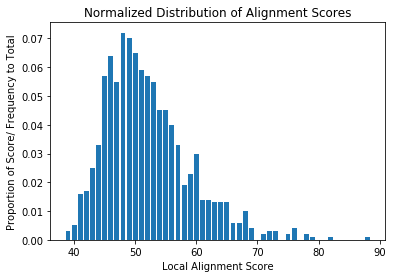

In [139]:
# create a bar plot of the normalized version of this distribution
def normalized_distribution_plot(distribution_dic, num_trials):
    #The horizontal axis should be the 
    #scores and the vertical axis should be 
    #the fraction of total trials corresponding to each score.
    xvals=[]
    yvals=[]
    #total = 0
    for score in distribution_dic:
        xvals.append(score)
        #y_val = distribution_dic[score]/ float(num_trials)
        yvals.append(distribution_dic[score]/ float(num_trials))
        #total += (score * y_val) 

    #plot results
    #print xvals, yvals
    p1 = plt.bar(xvals, yvals)
    plt.xlabel("Local Alignment Score")
    plt.ylabel("Proportion of Score/ Frequency to Total")
    plt.title("Normalized Distribution of Alignment Scores")
    plt.show()
    #return total
normalized_distribution_plot(human_fly_distribution, 1000)

# Question 5

In [158]:
def mean_stdev(distribution_dic):
    """
    Give a distribution dictionary {score:frequency}
    Compute mean and standard deviation of the distribution
    """
    total = sum(key*distribution_dic[key] for key in distribution_dic)*1.0
    mean = total/1000
    
    total = 0
    for key in distribution_dic:
        for num in range(distribution_dic[key]):
            total +=(key-mean)**2
    stdev = (total/1000)**(1/2)
    return mean, stdev

In [164]:
mean, stdev = mean_stdev(human_fly_distribution)
#knowing that the human&fly local score is 875
score_z = (875-mean)/stdev
print score_z, mean, stdev

822.975 52.025 1.0


# Question 6

The score resulting from the local alignment of the HumanEyelessProtein and the FruitflyEyelessProtein is NOT by chance. According to Wiki, we see that in normal distribution, the chance of staying outside 7*stdev from the mean is 1 / 390682215445. Our alignment score between human and fly shows that it is 822*stdev from its mean, meaning that this chance is even lower. 
The chance of winning Spain's Spanish Christmas Lottery is 1/(100,000*180*10), five-digit-number* num of series*10 decimos, is higher than the chance of getting such an alignment.

# Question 7

In [ ]:
diag_score: 2
off_diag_score: 1
dash_score: 0

# Question 8

In [15]:
def load_dic():
    """
    Use this function to load a dictionary
    """
    data_file = urllib2.urlopen("http://storage.googleapis.com/codeskulptor-assets/assets_scrabble_words3.txt")
    data = data_file.read()
    data_lines = data.split('\n')
    
    dict_list = []
    for line in data_lines:
        dict_list.append(line)

    return dict_list
word_list = load_dic()

In [65]:
alphabet_matrix = build_scoring_matrix('abcdefghijklmnopqrstuvwxyz',2 ,1 ,0)

In [81]:
def compute_word_matrix_global(seq_x, seq_y, scoring_matrix):
    """
    3rd version of compute_alignment_matrix to simplify computation
    Compute word global alignment matrix by taking two sequences and a scoring matrix
    """
    alignment_matrix = compute_alignment_matrix(seq_x, seq_y, alphabet_matrix, False)   
    score = alignment_matrix[len(seq_x)][len(seq_y)]
  
    return score

In [87]:
def check_spelling(checked_word,dist,word_list):
    """
    iterates through word_list and returns the set of all words 
    that are within edit distance dist of the string checked_word
    """
    suitable_list = []
    len1 = len(checked_word)

    for word in word_list:
        score = compute_word_matrix_global(checked_word, word, alphabet_matrix)
        if abs(len1+len(word)-score)<=dist:
            suitable_list.append(word)

    return suitable_list

In [88]:
print check_spelling("humble",1,word_list)

['bumble', 'fumble', 'humble', 'humbled', 'humbler', 'humbles', 'humbly', 'jumble', 'mumble', 'rumble', 'tumble']


In [89]:
print check_spelling("firefly",2,word_list)

['direly', 'finely', 'fireclay', 'firefly', 'firmly', 'firstly', 'fixedly', 'freely', 'liefly', 'refly', 'tiredly']


# Question 9

1. Check if the provided string is an actual word
    Iterate through the provided list and keep those that exist in the word_list

2. Focus on the three editing operations in Q7
